<a href="https://colab.research.google.com/github/victorfiz/ucl_ml/blob/main/k_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MyKNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            nearest_neighbors = self.y_train[np.argsort(distances)[:self.n_neighbors]]
            predictions.append(1 if np.sum(nearest_neighbors) > self.n_neighbors / 2 else 0)
        return np.array(predictions)

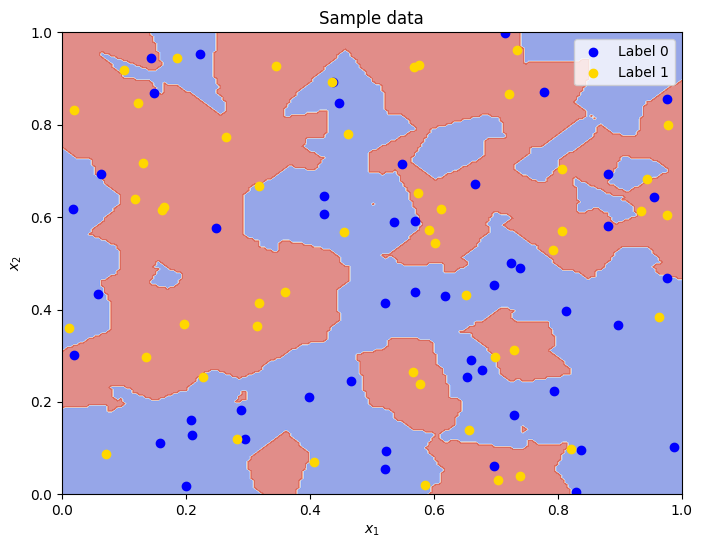

In [7]:
# Initialise parameters
np.random.seed(0)
S_size = 100
v = 3  # number of nearest neighbours

# Generate random points in 2D space and assign labels
X_train = np.random.rand(S_size, 2)
y_train = np.random.choice([0, 1], size=S_size)

# Instantiate and fit your custom KNN classifier
my_knn = MyKNeighborsClassifier(n_neighbors=v)
my_knn.fit(X_train, y_train)

# Create a grid of points to classify
xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict labels for each point in the grid using your custom classifier
Z = my_knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)  # Regions colored
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='Label 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='gold', label='Label 1')
plt.title('Sample data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [16]:
import numpy as np
from joblib import Parallel, delayed
from tqdm import tqdm

# Constants
num_runs = 100
num_train_points = 4000
num_test_points = 1000
k_values = range(1, 50)  # k from 1 to 49
generalisation_errors = []

# Function to generate data point (x, y) from distribution ph(x, y)
def sample_from_ph(h, p_heads=0.8):
    x = np.random.rand(2)
    if np.random.rand() < p_heads:
        y = h(x)
    else:
        y = np.random.randint(0, 2)
    return x, y

# Function to generate hypothesis h from pH
def generate_random_hypothesis():
    centers = np.random.rand(100, 2)
    labels = np.random.randint(0, 2, 100)

    def h(x):
        distances = np.linalg.norm(centers - x, axis=1)
        nearest_labels = labels[np.argsort(distances)[:3]]
        return 1 if np.sum(nearest_labels) > 1 else 0

    return h

# Zero-one loss function
def my_zero_one_loss(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Run single experiment for given k and run number
def single_experiment(k):
    h = generate_random_hypothesis()

    # Generate training data from ph(x, y)
    X_train = []
    y_train = []
    for _ in range(num_train_points):
        x, y = sample_from_ph(h)
        X_train.append(x)
        y_train.append(y)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Generate test data from ph(x, y)
    X_test = []
    y_test = []
    for _ in range(num_test_points):
        x, y = sample_from_ph(h)
        X_test.append(x)
        y_test.append(y)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Train custom k-NN model
    knn = MyKNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute generalisation error using custom zero-one loss
    y_pred = knn.predict(X_test)
    error = my_zero_one_loss(y_test, y_pred)
    return error

# Experimental protocol with parallel processing and progress tracking
for k in tqdm(k_values, desc="k-values progress"):
    # Parallel execution for each run
    errors = Parallel(n_jobs=-1)(delayed(single_experiment)(k) for _ in range(num_runs))

    # Average error across runs for the current k
    generalisation_errors.append(np.mean(errors))

generalisation_errors = np.array(generalisation_errors)


k-values progress: 100%|██████████| 49/49 [37:43<00:00, 46.20s/it]


In [17]:
print(generalisation_errors)

# 19:02 min

# generalisation_errors = [0.20547 0.20826 0.15692 0.16092 0.14706 0.14918 0.14563 0.14862 0.14416
#  0.14668 0.14647 0.14679 0.1471  0.14936 0.14881 0.14966 0.14783 0.14953
#  0.1511  0.1514  0.1515  0.15225 0.15475 0.15246 0.15324 0.15654 0.15699
#  0.15487 0.15902 0.15673 0.15739 0.16098 0.15841 0.16166 0.16149 0.1597
#  0.16086 0.16223 0.16049 0.16343 0.16346 0.16689 0.16345 0.16599 0.16564
#  0.16738 0.1682  0.17018 0.17036]

[0.20547 0.20826 0.15692 0.16092 0.14706 0.14918 0.14563 0.14862 0.14416
 0.14668 0.14647 0.14679 0.1471  0.14936 0.14881 0.14966 0.14783 0.14953
 0.1511  0.1514  0.1515  0.15225 0.15475 0.15246 0.15324 0.15654 0.15699
 0.15487 0.15902 0.15673 0.15739 0.16098 0.15841 0.16166 0.16149 0.1597
 0.16086 0.16223 0.16049 0.16343 0.16346 0.16689 0.16345 0.16599 0.16564
 0.16738 0.1682  0.17018 0.17036]


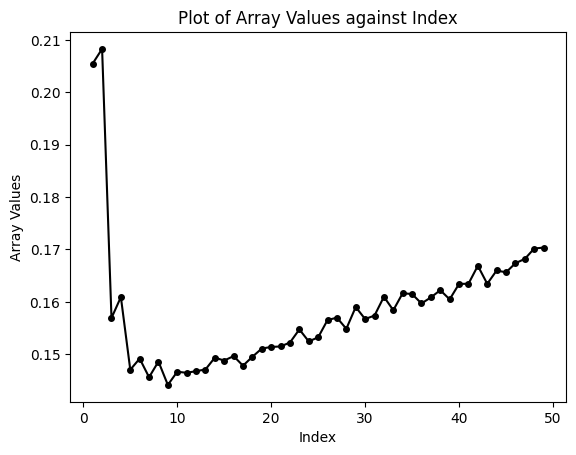

In [26]:
plt.plot(k_values, generalisation_errors, marker='o', markersize=4, color='black')
plt.xlabel('Index')
plt.ylabel('Array Values')
plt.title('Plot of Array Values against Index')
plt.grid(False)
plt.show()

In [6]:
from tqdm import tqdm

# Define the range for m and k
m_values = [100] + list(range(500, 4001, 500))
k_values = range(1, 50)
optimal_k_means = []

# Function to sample data from pH based on hypothesis h
def sample_from_ph(h, num_points):
    X = np.random.rand(num_points, 2)
    y = []
    for x in X:
        label = h(x)
        # Assign y based on biased coin flip
        y.append(label if np.random.rand() < 0.8 else 1 - label)
    return X, np.array(y)

# Function to generate a random hypothesis h from pH
def generate_random_hypothesis():
    # Define 100 random centers in 2D space and assign random labels (0 or 1)
    centers = np.random.rand(100, 2)
    labels = np.random.randint(0, 2, 100)

    # Define the hypothesis function h based on the majority vote of 3 nearest neighbors
    def h(x):
        # Calculate distances from x to each center
        distances = np.linalg.norm(centers - x, axis=1)
        # Find the 3 nearest neighbors and their labels
        nearest_labels = labels[np.argsort(distances)[:3]]
        # Return the majority label
        return 1 if np.sum(nearest_labels) > 1 else 0

    return h

# Loop over each m with tqdm for less frequent progress tracking
for m in tqdm(m_values, desc="Processing m-values"):
    optimal_k_runs = []

    # Run 100 iterations for each m
    for _ in range(100):
        # Generate a random hypothesis h
        h = generate_random_hypothesis()

        # Sample training and test data from pH(x, y)
        X_train, y_train = sample_from_ph(h, m)
        X_test, y_test = sample_from_ph(h, 1000)

        errors = []

        # Loop over each k in k_values
        for k in k_values:
            # Initialize and train k-NN model with the current k
            knn = MyKNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Predict on test set and compute generalisation error
            y_pred = knn.predict(X_test)
            error = np.mean(y_pred != y_test)  # Misclassification rate
            errors.append(error)

        # Find the k with the minimal error for this run
        optimal_k = k_values[np.argmin(errors)]
        optimal_k_runs.append(optimal_k)

    # Compute the mean of optimal k's over the 100 runs
    mean_optimal_k = np.mean(optimal_k_runs)
    optimal_k_means.append(mean_optimal_k)

Processing m-values:   0%|          | 0/9 [00:00<?, ?it/s]


KeyboardInterrupt: 